In [1]:
import pandas as pd
import os.path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Baseline
#dataset = pd.read_csv('debug/20231204-oc1:n-baseline-vm8.csv', sep='\t')

# OC2
#dataset = pd.read_csv('debug/20231204-oc2:n-baseline-vm8.csv', sep='\t')
dataset = pd.read_csv('debug/20231206-oc1:1-oc1.5:2-oc2.6:n-vm8.csv', sep='\t')

# OC3
#dataset = pd.read_csv('debug/20231129-oc3:n-baseline-vm8.csv', sep='\t')
#dataset = pd.read_csv('debug/20231130-oc1:1-oc1.5:2-oc6:n-vm8.csv', sep='\t')

# OC4
#dataset = pd.read_csv('debug/20231130-oc4:n-baseline-vm8.csv', sep='\t')
#dataset = pd.read_csv('debug/20231129-oc1:1-oc1.5:2-oc16:n-vm8.csv', sep='\t')


keys_as_float = ['tmp', 'val', 'config', 'sb_unused']
for key in keys_as_float: dataset[key] = dataset[key].apply(lambda x : None if x == 'None' else float(x))
dataset['time'] = dataset['tmp'] / 60

In [19]:
dataset.head()

,tmp,rec,res,val,config,subset,vm_uuid,vm_cmn,sb_oc,sb_unused,sb_dsc,time
0,0.0,global,cpu,NaN,232.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00
1,0.0,global,mem,0.016686,1031742.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2,15.0,global,cpu,0.001608,232.0,NaN,NaN,NaN,NaN,NaN,NaN,0.25
3,15.0,global,mem,0.016691,1031742.0,NaN,NaN,NaN,NaN,NaN,NaN,0.25
4,30.0,global,cpu,0.000221,232.0,NaN,NaN,NaN,NaN,NaN,NaN,0.50


# Investigate global usage

In [3]:
overall = dataset.loc[dataset['rec'] == 'global']
overall_cpu = overall.loc[overall['res'] == 'cpu']
overall_mem = overall.loc[overall['rec'] == 'mem']

In [4]:
# Convert percent to CPU cores
pd.options.mode.chained_assignment = None  # default='warn'
overall_cpu['cores'] = overall_cpu['val'] * 232

(0.0, 800.0)

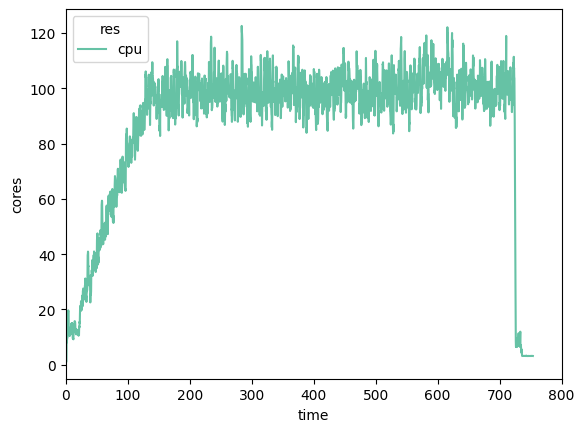

In [5]:
palette = sns.color_palette("Set2", overall_cpu['res'].nunique())

g_val = sns.lineplot(data=overall_cpu, x='time', y='cores', hue='res', palette=palette)
plt.xlim([0, 800])

# Investigate subsets usage

In [49]:
subsets = dataset.loc[dataset['rec'] == 'subset']
subsets_cpu = subsets.loc[subsets['res'] == 'cpu']
subsets_mem = subsets.loc[subsets['res'] == 'mem']

In [50]:
for x in subsets_cpu['subset'].unique():
    print(x, subsets_cpu.loc[subsets_cpu['subset'] == x]['val'].max(), subsets_cpu.loc[subsets_cpu['subset'] == x]['config'].max())

subset-1.0 73.26679974023335 113.0
subset-1.5 52.32080447492778 76.0
subset-16.0 42.97130885773009 43.0


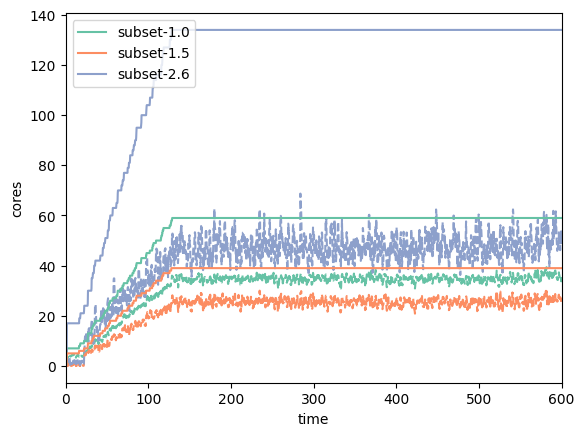

In [8]:
palette = sns.color_palette("Set2", subsets_cpu['subset'].nunique())
# todo Hue_order
g_val = sns.lineplot(data=subsets_cpu, x='time', y='val', hue='subset', linestyle ='--', palette=palette, legend=False)
g_config = sns.lineplot(data=subsets_cpu, x='time', y='config', hue='subset', palette=palette)

g_config.legend(loc='upper left', title=None)
handles, previous_labels = g_config.get_legend_handles_labels()

#g_config.legend(handles=[handles[1], handles[0], handles[2]], labels=['vNode 1:1', 'vNode 2:1', 'vNode 3:1'], loc='upper left', title=None)
plt.xlim([0, 600])
g_config.set_ylabel('cores')
#g_config.set_xlabel('time')
#g_config.set_xticklabels([])

plt.gcf().savefig('figures/vNodes-evolution.pdf', bbox_inches='tight')

['subset', 'subset-1.0', 'subset-1.5', 'subset-2.6', 'variable', 'config', 'val']
[<matplotlib.lines.Line2D object at 0x7f219c4f4610>, <matplotlib.lines.Line2D object at 0x7f219c4fd340>, <matplotlib.lines.Line2D object at 0x7f219c50f610>, <matplotlib.lines.Line2D object at 0x7f219c50f3a0>, <matplotlib.lines.Line2D object at 0x7f219c4b6520>, <matplotlib.lines.Line2D object at 0x7f219c4b66d0>, <matplotlib.lines.Line2D object at 0x7f219c4b6580>]


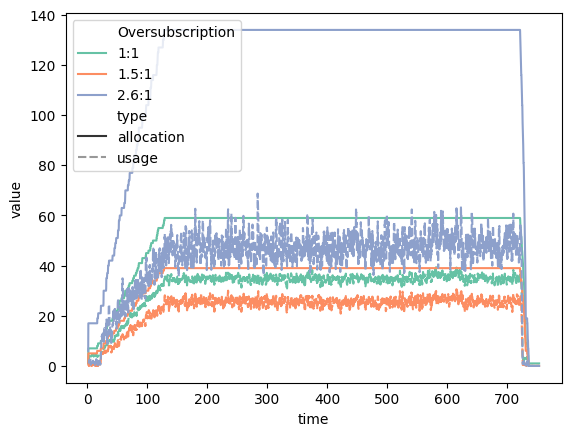

In [28]:
subsets_cpu_m = subsets_cpu.melt(id_vars=['time', 'subset'], value_vars=['config', 'val'])
graph = sns.lineplot(data=subsets_cpu_m, x='time', y='value', hue='subset', style='variable', palette=palette)

my_wanted_legend = graph.get_legend()
my_wanted_handles, my_wanted_labels = graph.get_legend_handles_labels()

print(my_wanted_labels)
my_wanted_labels = ['Oversubscription','1:1', '1.5:1', '2.6:1', 'type', 'allocation', 'usage']

my_wanted_handles = [my_wanted_handles[0], my_wanted_handles[1], my_wanted_handles[2], my_wanted_handles[3], my_wanted_handles[4], my_wanted_handles[5], my_wanted_handles[6]]
my_wanted_handles[-1].set_alpha(0.5)

print(my_wanted_handles)

graph.legend(handles= my_wanted_handles, labels=my_wanted_labels)

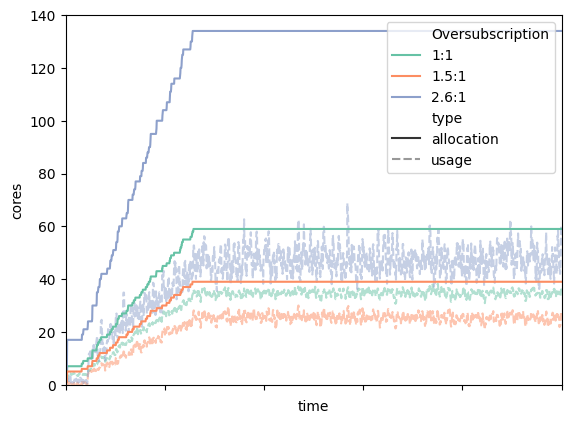

In [29]:
palette = sns.color_palette("Set2", subsets_cpu['subset'].nunique())

g_val = sns.lineplot(data=subsets_cpu, x='time', y='val', hue='subset', palette=palette, linestyle='--', alpha=0.5)
g_config = sns.lineplot(data=subsets_cpu, x='time', y='config', hue='subset', palette=palette)

#handles, previous_labels = my_wanted_legend.get_legend_handles_labels()
#g_config.legend(handles= my_wanted_legend.get_legend_handles_labels(), labels=['vNode 1:1', 'vNode 2:1', 'vNode 3:1'])
g_config.legend(handles= my_wanted_handles, labels=my_wanted_labels, loc='upper right')

plt.xlim([0, 500])
plt.ylim([0, 140])
g_config.set_ylabel('cores')
g_config.set_xlabel('time')
g_config.set_xticklabels([])
#g_config.legend(loc='upper right')

plt.gcf().savefig('figures/vNodes-evolution.pdf', bbox_inches='tight')

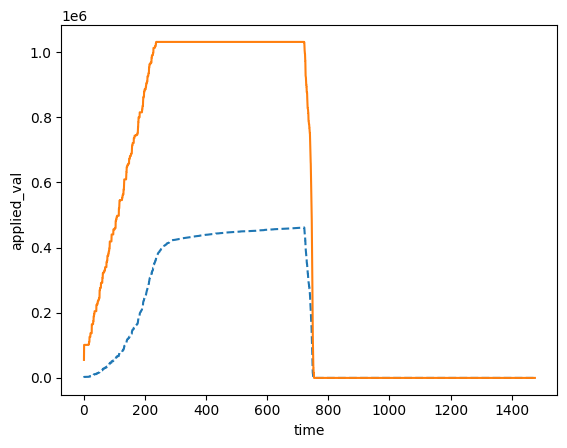

In [35]:
palette = sns.color_palette("Set2", subsets_mem['subset'].nunique())
subsets_mem['applied_val'] = subsets_mem['val']*subsets_mem['config']
# todo Hue_order
g_val = sns.lineplot(data=subsets_mem, x='time', y='applied_val', linestyle ='--')
g_val = sns.lineplot(data=subsets_mem, x='time', y='config')

# Investigate VM usage

In [36]:
vm = dataset.loc[dataset['rec'] == 'vm']
vm_cpu = vm.loc[vm['res'] == 'cpu']
vm_mem = vm.loc[vm['res'] == 'mem']

In [13]:
vm_cpu = vm_cpu.loc[vm_cpu['vm_cmn'] == 'vm81']

In [37]:
# Convert percent to CPU cores
pd.options.mode.chained_assignment = None  # default='warn'
vm_cpu['cores'] = vm_cpu['val'] * vm_cpu['config']

In [38]:
vm_cpu['cores'].max()

8.0

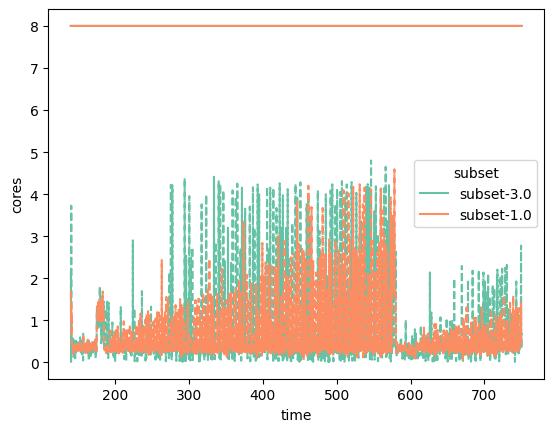

In [16]:
palette = sns.color_palette("Set2", vm_cpu['subset'].nunique())
# todo Hue_order
g_val = sns.lineplot(data=vm_cpu, x='time', y='cores', hue='subset', linestyle ='--', palette=palette, legend=False)
g_config = sns.lineplot(data=vm_cpu, x='time', y='config', hue='subset', palette=palette)

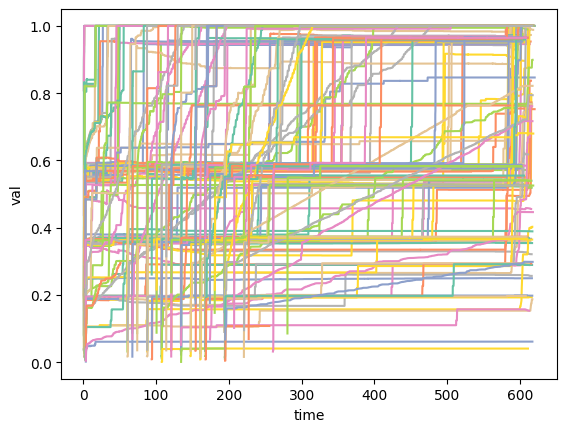

In [12]:
palette = sns.color_palette("Set2", vm_cpu['vm_uuid'].nunique())

g_val = sns.lineplot(data=vm_mem, x='time', y='val', hue='vm_uuid', palette=palette, legend=False)

# Dive into subset configuration

In [12]:
import json
subsets_unarchived = subsets
example = json.loads(subsets_unarchived['sb_dsc'].iloc[0])
print(len(example['consumer_list']))

5


In [13]:
subsets_unarchived['list_vm']  = subsets_unarchived['sb_dsc'].apply(lambda x : json.loads(x)['consumer_list'])
subsets_unarchived['count_vm'] = subsets_unarchived['sb_dsc'].apply(lambda x : len(json.loads(x)['consumer_list']))

In [ ]:
print(subsets_unarchived['count_vm'])

/tmp/ipykernel_8854/75521460.py:3: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  g_val = sns.lineplot(data=subsets_unarchived.loc[subsets_unarchived['res'] == 'cpu'], x='time', y='count_vm', hue='res', palette=palette)


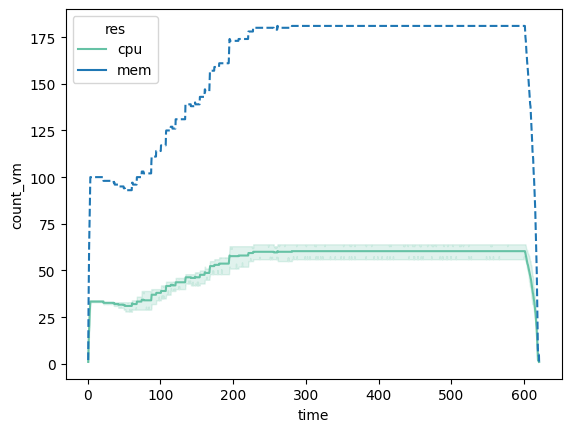

In [15]:
palette = sns.color_palette("Set2", subsets_unarchived['res'].nunique())
# todo Hue_order
g_val = sns.lineplot(data=subsets_unarchived.loc[subsets_unarchived['res'] == 'cpu'], x='time', y='count_vm', hue='res', palette=palette)
g_val = sns.lineplot(data=subsets_unarchived.loc[subsets_unarchived['res'] == 'mem'], x='time', y='count_vm', hue='res', linestyle='--')

# Investigate predictor performance

In [166]:
predictor = pd.read_csv('debug/predictor.csv')
for key in predictor.keys(): predictor[key] = predictor[key].apply(lambda x : float(x) if x != 'None' else None)

In [12]:
predictor.head()

,timestamp,prediction,resources,usage
0,60.0,NaN,6.0,5.454915
1,75.0,6.0,6.0,2.648536
2,90.0,6.0,6.0,3.417470
3,105.0,6.0,6.0,2.329599
4,120.0,6.0,6.0,3.307658


<Axes: xlabel='timestamp', ylabel='prediction'>

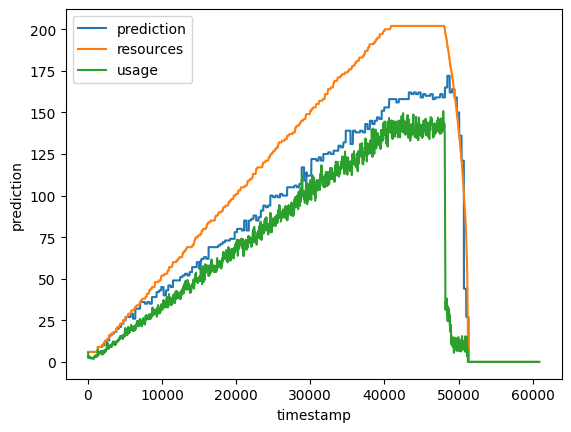

In [167]:
sns.lineplot(data=predictor, x='timestamp', y='prediction', label='prediction')
sns.lineplot(data=predictor, x='timestamp', y='resources', label='resources')
sns.lineplot(data=predictor, x='timestamp', y='usage', label='usage')

(-20.0, 10.0)

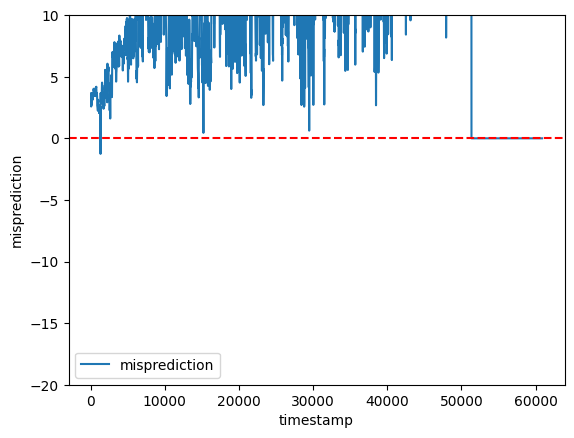

In [168]:
predictor['misprediction'] = predictor['prediction'] - predictor['usage']
g = sns.lineplot(data=predictor, x='timestamp', y='misprediction', label='misprediction')
plt.axhline(y=0.0, color='r', linestyle='--')
g.set_ylim(-20, 10)
#g.set_xlim(0, 7200)